#### Import the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from sklearn.metrics import confusion_matrics,

#### Read the dataset

In [3]:
df = pd.read_csv('Hotel Reservations.csv')
# OR
#df = pd.read_excel('file_name.xlsx')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [4]:
df.shape

(36275, 19)

### Data preprocessing


#### 1) Create a function to return a dataframe containing columns, count of null values and percentage of null values for each column

In [11]:
def fetch_count_and_percent_of_null(data):  # data is df
    nv = data.isnull().sum()  # nv = null values
    nv = nv[nv>0]
    res = pd.DataFrame({'Feature':nv.index,'Count_Null':nv.values,
                       'Percent_Null':(nv.values/data.shape[0])*100})
    res = res.sort_values('Percent_Null',ascending=False)
    return res

In [12]:
fetch_count_and_percent_of_null(df)

,Feature,Count_Null,Percent_Null


In [13]:
df.isnull().sum()

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

#### Handle Duplicates

In [5]:
df.duplicated().sum()

0

#### If duplicates exist

In [ ]:
df.drop_duplicates(inplace=True)

#### Check data types

In [14]:
df.dtypes

Booking_ID                               object
no_of_adults                              int64
no_of_children                            int64
no_of_weekend_nights                      int64
no_of_week_nights                         int64
type_of_meal_plan                        object
required_car_parking_space                int64
room_type_reserved                       object
lead_time                                 int64
arrival_year                              int64
arrival_month                             int64
arrival_date                              int64
market_segment_type                      object
repeated_guest                            int64
no_of_previous_cancellations              int64
no_of_previous_bookings_not_canceled      int64
avg_price_per_room                      float64
no_of_special_requests                    int64
booking_status                           object
dtype: object

#### Target Variable

In [16]:
df['booking_status'].value_counts()

Not_Canceled    24390
Canceled        11885
Name: booking_status, dtype: int64

#### Feature Preprocessing

#### Feature Engineering

#### Separate numerical and Categorical Featurs

In [17]:
num_cols = df.dtypes[df.dtypes!='object'].index
cat_cols = df.dtypes[df.dtypes=='object'].index
print(num_cols)
print(cat_cols)

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')
Index(['Booking_ID', 'type_of_meal_plan', 'room_type_reserved',
       'market_segment_type', 'booking_status'],
      dtype='object')


In [20]:
for i in cat_cols[1:]:
    print(i,df[i].unique())

type_of_meal_plan ['Meal Plan 1' 'Not Selected' 'Meal Plan 2' 'Meal Plan 3']
room_type_reserved ['Room_Type 1' 'Room_Type 4' 'Room_Type 2' 'Room_Type 6' 'Room_Type 5'
 'Room_Type 7' 'Room_Type 3']
market_segment_type ['Offline' 'Online' 'Corporate' 'Aviation' 'Complementary']
booking_status ['Not_Canceled' 'Canceled']


In [21]:
df['room_type_reserved'].value_counts()

Room_Type 1    28130
Room_Type 4     6057
Room_Type 6      966
Room_Type 2      692
Room_Type 5      265
Room_Type 7      158
Room_Type 3        7
Name: room_type_reserved, dtype: int64

In [23]:
from collections import Counter


In [24]:
df1 = df.copy()

In [26]:
df['room_type_reserved'] = df['room_type_reserved'].str.slice(-1)
df['room_type_reserved'].value_counts()

1    28130
4     6057
6      966
2      692
5      265
7      158
3        7
Name: room_type_reserved, dtype: int64

In [ ]:
cols = cat_cols[1:]

plt.figure(figsize=(10,9))
for i in cat_cols:
    

### EDA

In [18]:
for i in df.columns:
    print(f'Feature {i} | Unique Count {df[i].nunique()}')

Feature Booking_ID | Unique Count 36275
Feature no_of_adults | Unique Count 5
Feature no_of_children | Unique Count 6
Feature no_of_weekend_nights | Unique Count 8
Feature no_of_week_nights | Unique Count 18
Feature type_of_meal_plan | Unique Count 4
Feature required_car_parking_space | Unique Count 2
Feature room_type_reserved | Unique Count 7
Feature lead_time | Unique Count 352
Feature arrival_year | Unique Count 2
Feature arrival_month | Unique Count 12
Feature arrival_date | Unique Count 31
Feature market_segment_type | Unique Count 5
Feature repeated_guest | Unique Count 2
Feature no_of_previous_cancellations | Unique Count 9
Feature no_of_previous_bookings_not_canceled | Unique Count 59
Feature avg_price_per_room | Unique Count 3930
Feature no_of_special_requests | Unique Count 6
Feature booking_status | Unique Count 2


#### Univariate Analysis

#### 1) Countplot for Categorical Features

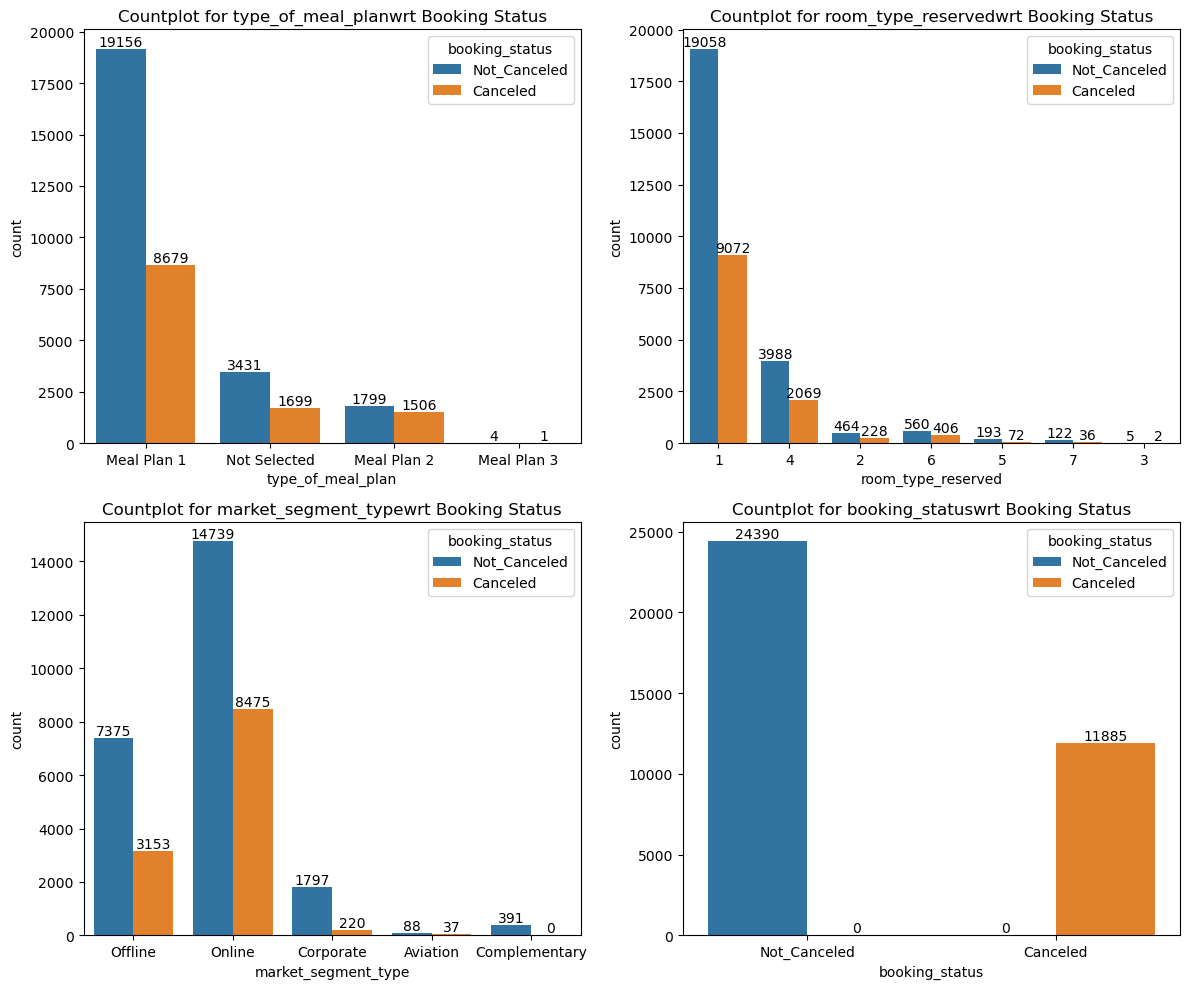

In [37]:
cols =  cat_cols[1:]

plt.figure(figsize=(12,10))
for i in range(len(cols)): 
    plt.subplot(2,2,i+1)
    ax = sns.countplot(x=df[cols[i]],hue=df['booking_status'])
    for j in ax.containers:
        ax.bar_label(j)
    plt.title(f'Countplot for {cols[i]}wrt Booking Status')

plt.tight_layout()
plt.show()

In [40]:
for i in num_cols:
    print(f'feature {i} | count of unique values- {df[i].nunique()}')

feature no_of_adults | count of unique values- 5
feature no_of_children | count of unique values- 6
feature no_of_weekend_nights | count of unique values- 8
feature no_of_week_nights | count of unique values- 18
feature required_car_parking_space | count of unique values- 2
feature lead_time | count of unique values- 352
feature arrival_year | count of unique values- 2
feature arrival_month | count of unique values- 12
feature arrival_date | count of unique values- 31
feature repeated_guest | count of unique values- 2
feature no_of_previous_cancellations | count of unique values- 9
feature no_of_previous_bookings_not_canceled | count of unique values- 59
feature avg_price_per_room | count of unique values- 3930
feature no_of_special_requests | count of unique values- 6


#### 2) Boxplot for numerical Features

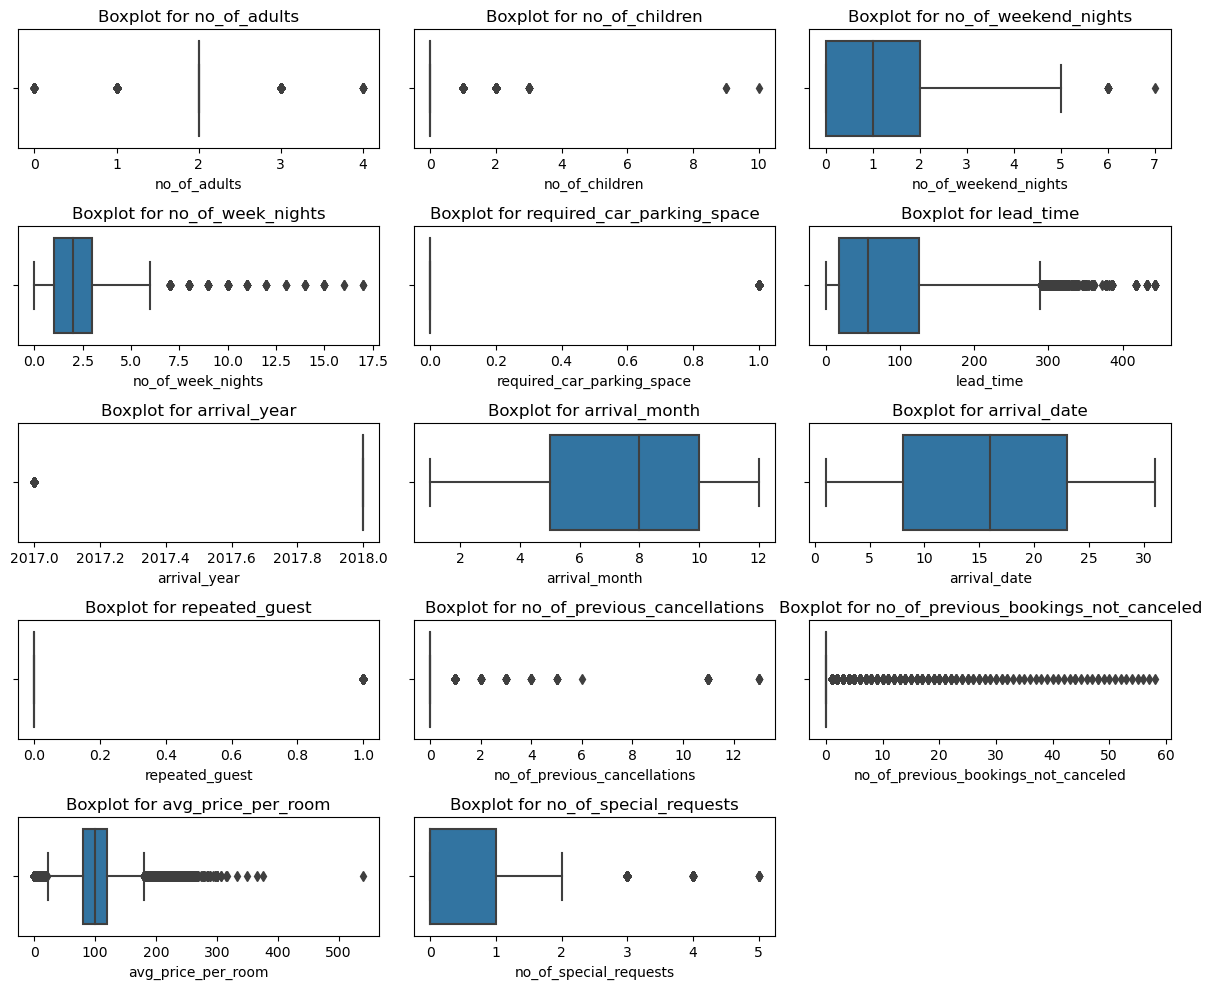

In [34]:
cols = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'required_car_parking_space', 'lead_time',
       'arrival_year', 'arrival_month', 'arrival_date', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests']

plt.figure(figsize=(12,10))
for i in range(len(cols)): 
    plt.subplot(5,3,i+1)
    sns.boxplot(x=df[cols[i]])
    plt.title(f'Boxplot for {cols[i]}')

plt.tight_layout()
plt.show()

In [41]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [42]:
print(df[(df['no_of_adults']==0) & (df['no_of_children']==0)].count())

Booking_ID                              0
no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64


In [43]:
print(df[(df['no_of_weekend_nights']==0) & (df['no_of_week_nights']==0)].count())

Booking_ID                              78
no_of_adults                            78
no_of_children                          78
no_of_weekend_nights                    78
no_of_week_nights                       78
type_of_meal_plan                       78
required_car_parking_space              78
room_type_reserved                      78
lead_time                               78
arrival_year                            78
arrival_month                           78
arrival_date                            78
market_segment_type                     78
repeated_guest                          78
no_of_previous_cancellations            78
no_of_previous_bookings_not_canceled    78
avg_price_per_room                      78
no_of_special_requests                  78
booking_status                          78
dtype: int64


In [44]:
num_cols = df.dtypes[df.dtypes!='object'].index

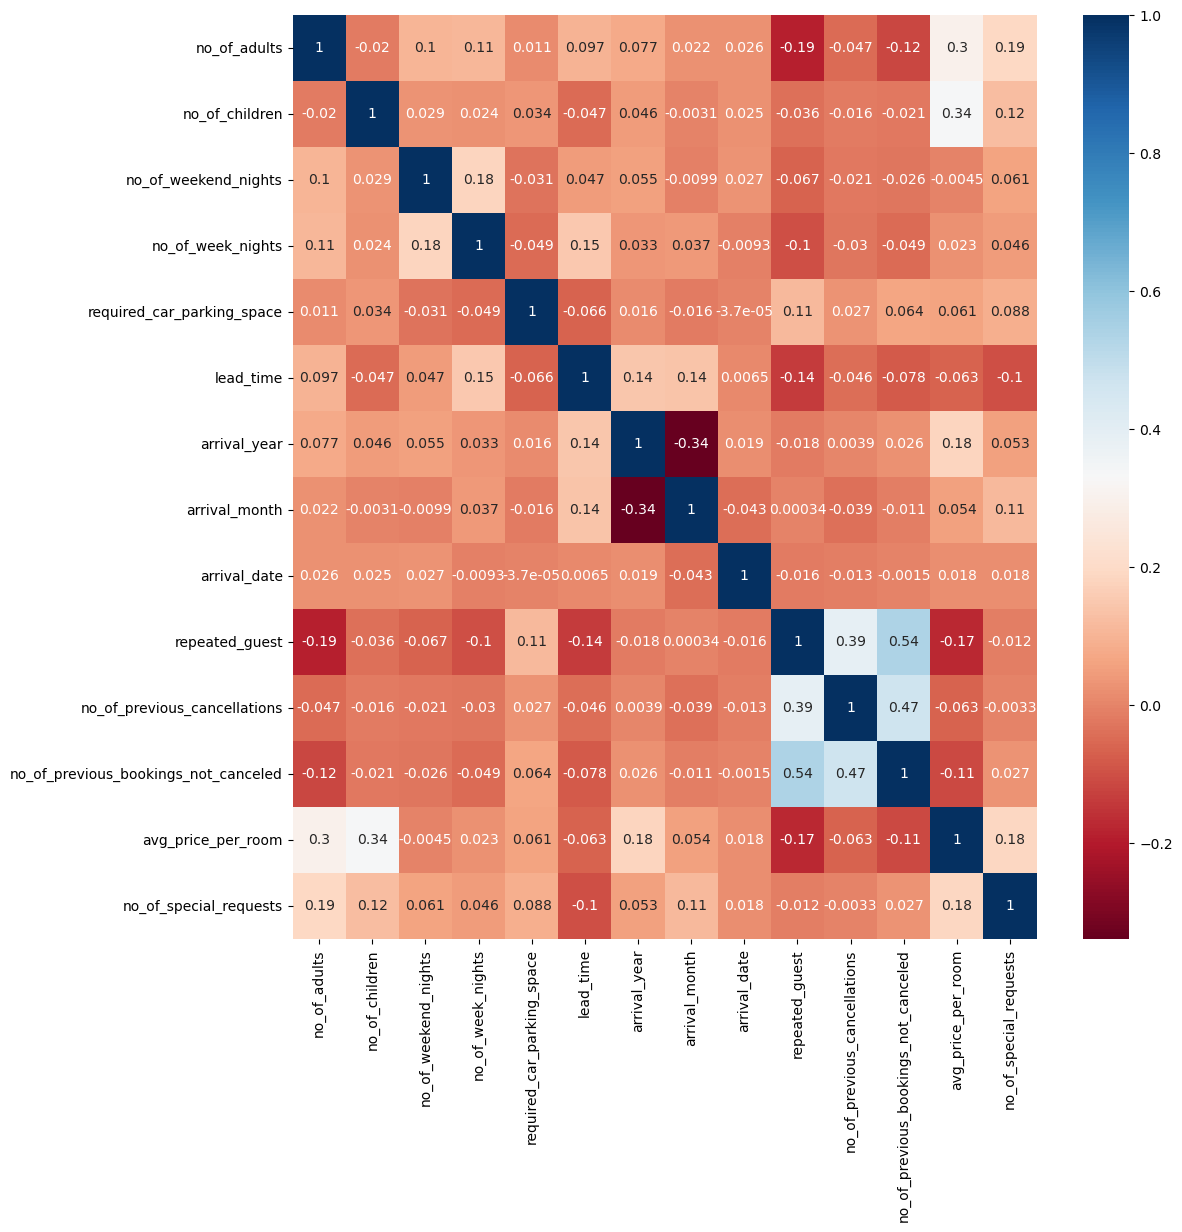

In [45]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')  # annot= True => annotation
plt.show()

In [46]:
cols = ['no_of_previous_bookings_not_canceled','lead_time','avg_price_per_room']
a = df[cols].describe(percentiles =[0.01,0.02,0.03,0.05,0.95,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,5%,50%,95%,97%,98%,99%,max
no_of_previous_bookings_not_canceled,0.0,0.0,0.00,0.00,0.0,0.00,0.0,0.000,1.0000,4.0,58.0
lead_time,0.0,0.0,0.00,0.00,1.0,57.00,273.0,301.000,314.0000,346.0,443.0
avg_price_per_room,0.0,0.0,41.43,54.09,61.0,99.45,165.0,178.956,190.5416,208.0,540.0


In [47]:
print(df[df['avg_price_per_room']>208].shape)
print(df[df['avg_price_per_room']<41.43].shape)
print(df[df['avg_price_per_room']>346].shape)

(361, 19)
(721, 19)
(4, 19)


#### Outlier Treatment

In [50]:
df['avg_price_per_room'] = np.where(df['avg_price_per_room']>208,208,df['avg_price_per_room'])
df['avg_price_per_room'] = np.where(df['avg_price_per_room']<41.43,41.43,df['avg_price_per_room'])

In [51]:
a = df[cols].describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

,min,1%,2%,3%,50%,97%,98%,99%,max
no_of_previous_bookings_not_canceled,0.00,0.00,0.00,0.00,0.00,0.000,1.0000,4.0,58.0
lead_time,0.00,0.00,0.00,0.00,57.00,301.000,314.0000,346.0,443.0
avg_price_per_room,41.43,41.43,41.43,54.09,99.45,178.956,190.5416,208.0,208.0


#### 3) Histplot for numerical Features

In [13]:
cols = []

plt.figure(figsize=(12,20))
for i in range(len(cols)):  
    plt.subplot(,,i+1)    
    sns.distplot(x=df[cols[i]],kde=True)
    plt.title(f'Histplot for {cols[i]}')

plt.tight_layout()
plt.show()

#### 4) Pie Chart for Categorical Features

#### Correlation

In [ ]:
num_cols = df.dtypes[df.dtypes!='object'].index

In [ ]:
corr = df[num_cols].corr()

plt.figure(figsize=(12,12))
sns.heatmap(corr,annot=True,cmap='RdBu')  # annot= True => annotation
plt.show()

#### Drop Redundant Features (If Any)

In [ ]:
df.drop(col_list,axis=1)

#### Outlier Treatment

In [ ]:
a = df[cols].describe(percentiles =[0.01,0.02,0.03,0.97,0.98,0.99]).T
a = a.iloc[:,3:]
a

In [ ]:
df1 = df.copy()
df2 = df.copy()

### Method - 1 (Treats extreme outliers)

In [15]:
cols_left_skewed = []

def lower_outlier_treatment(x):
    x = x.clip(lower = x.quantile(0.01))
    return x

In [ ]:
df[cols_left_skewed] = df[cols_left_skewed].apply(lower_outlier_treatment)

In [ ]:
cols_right_skewed = []

def upper_outlier_treatment(x):
    x = x.clip(upper = x.quantile(0.99))
    return x

In [ ]:
df[cols_right_skewed] = df[cols_right_skewed].apply(lower_outlier_treatment)

### Method - 2 (Treats all outliers)

In [ ]:
cols_with_outliers = []

In [40]:
for i in df[cols_with_outliers]:
    q1 = df[i].quantile(0.25)
    q3 = df[i].quantile(0.75)
    iqr = q3 - q1
    upper = q3 + 1.5*iqr
    lower = q1 - 1.5*iqr
    df[i] = np.where(df[i]>upper,upper,df[i])
    df[i] = np.where(df[i]<lower,lower,df[i])

#### Encoding

In [43]:
cat_cols = df.dtypes[df.dtypes=='object'].index
print(cat_cols)

In [41]:
for i in cat_cols:
    print(i,df[i].nunique())

In [16]:
cols_to_be_encoded = []

df_dum = pd.get_dummies(data=df,columns = cols_to_be_encoded, drop_first=True)
print(df_dum.shape)
print(df_dum.columns)

In [17]:
df_dum.dtypes

#### Select x and y

In [20]:
x = df_dum.drop(['Target'],axis=1)
y = df_dum['Rent']
print(x.shape)
print(y.shape)

#### Assumption Check: Multicollinearity(VIF)

In [74]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [21]:
vif = pd.DataFrame()
vif['Feature'] = x.columns
vif['VIF'] = [variance_inflation_factor(x.values,i) for i in range(x.shape[1])]
vif = vif.sort_values('VIF',ascending=False)
vif

#### Assmption Check : Target variable is normally dist

In [42]:
from scipy.stats import shapiro, jarque_bera
# Ho : Data is normally dist => p>0.05
# H1 : Data is not normally dist => p<=0.05

In [22]:
test_stat,p = shapiro(df_dum['Target'])
print(test_stat)
print(p)

In [23]:
test_stat,p = shapiro(np.log((df_dum['Target'])))
print(test_stat)
print(p)

### OLS Model - 1

In [98]:
x1 = x.copy()
y1 = y.copy()

In [24]:
x1 = sm.add_constant(x1)
ols_m1 = sm.OLS(y1,x1).fit()
ols_m1.summary()

In [25]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

#### Inference
1) col1, cols2, cols3 etc have high p-value

### OLS - M2

In [26]:
x2 = x.drop(['cols_with_high_p_val'],axis=1)
y2 = y1.copy()

In [27]:
x2 = sm.add_constant(x2)
ols_m2 = sm.OLS(y2,x2).fit()
ols_m2.summary()

In [28]:
print('OLS_M1')
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

print('OLS_M2')
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

#### Assumption Check : Homescedasticity

In [ ]:
residuals = ols_m2.resid

In [ ]:
plt.scatter(ols_m2.predict(), residuals)   
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted values')
plt.show()

#### Split data into train and test

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

#### Function to evaluate Regression Model

In [31]:
from sklearn.metrics import *

#### Approach - 1

In [138]:
def eval_model_basic(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

#### Apporach - 2

In [32]:
def eval_model_advanced(model,x_train,y_train,x_test,y_test,modelname):
    model.fit(x_train,y_train)
    ypred = model.predict(x_test)
    train_r2 = model.score(x_train,y_train)
    train_r2 = model.score(x_test,y_test)
    test_mae = mean_absolute_error(ytest,ypred)
    test_mse = mean_squared_error(ytest,ypred)
    test_rmse = np.sqrt(mse)
    res = pd.DataFrame({'Train_R2':train_r2,'Test_R2':test_r2,'Test_MAE':test_mae,
                        'Test_MSE':test_mse,'Test_RMSE':test_rmse},index=[modelname])
    return res

In [37]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso

#### Linear Regression

In [33]:
lr1 = LinearRegression()
lr1_res = eval_model_advanced(lr1,x_train,y_train,x_test,y_test,'Lin_Reg')
lr1_res

#### If model Overfits => Apply Regularization

#### Ridge

In [ ]:
rid1 = Ridge()
rid1_res = eval_model_advanced(rid1,x_train,y_train,x_test,y_test,'Ridge')
rid1_res

#### Lasso

In [ ]:
las1 = Lasso()
las1_res = eval_model_advanced(las1,x_train,y_train,x_test,y_test,'Lasso')
las1_res

### Tabulate All Results

In [ ]:
all_res = pd.concat([lr1_res,rid1_res,las1_res])
all_res

#### Overtting and Underfitting

1) Overfitting<br>
a) Model with high train score and comparatively low test score.<br>
b) Model with high variance and low bias.


2) Underfitting<br>
a) Model with high test score and comparatively low train score.<br>
b) Model with low variance and high bias.

Bias varaince TradeOff<br>
1) Bais and Variance are inversely proprotaional.